<a href="https://colab.research.google.com/github/2303A52247/Gen-AI/blob/main/Gen_AI_Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import zipfile

train_zip_path = '/content/train-20250404T145129Z-001.zip'
val_zip_path = '/content/validation-20250404T145130Z-001.zip'

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train_data')

with zipfile.ZipFile(val_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/val_data')

In [11]:
import os

print("Train folder contents:", os.listdir('/content/train_data'))
print("Val folder contents:", os.listdir('/content/val_data'))

Train folder contents: ['train']
Val folder contents: ['validation']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.6984 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.6970 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 0.6931 - val_accuracy: 0.2500 - val_loss: 0.6924
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6918 - val_accuracy: 0.2500 - val_loss: 0.6924
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step - acc

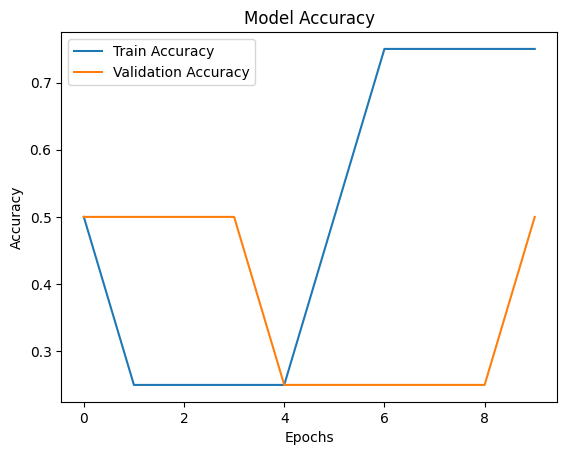

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.8631 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step - accuracy: 0.7500 - loss: 0.5162 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step - accuracy: 1.0000 - loss: 0.1059 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - accuracy: 0.5000 - loss: 0.5136 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step - accuracy: 0.5000 - loss: 0.6173 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step - accuracy: 0.5000 - loss: 0.5285 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step - accuracy: 1.0000 - loss: 0.2785 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step - accuracy: 0.7500 - loss: 0.4134 - val_accuracy: 0.5000 - val_loss: 0.

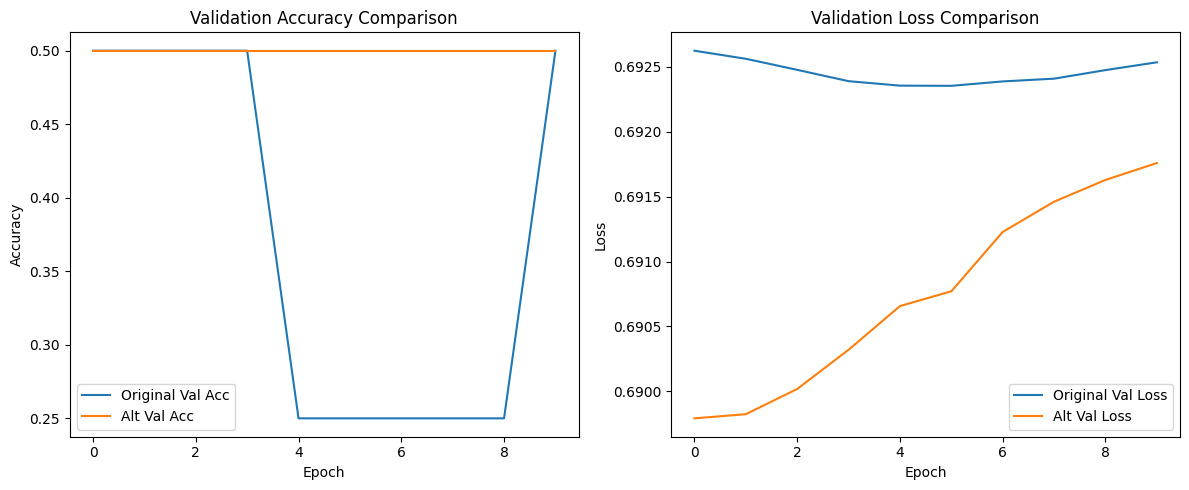

✅ Original model performs better on validation data.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta
import matplotlib.pyplot as plt

train_dir = '/content/train_data/train'
val_dir = '/content/val_data/validation'

img_size = (128, 128)
batch_size = 32
epochs = 10

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

def build_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_model()
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=epochs, validation_data=val_data)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

from tensorflow.keras.layers import Dropout, BatchNormalization

def build_alternative_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

alt_model = build_alternative_model()
alt_model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
alt_history = alt_model.fit(train_data, epochs=epochs, validation_data=val_data)

print("Original Model Final Training Accuracy:", history.history['accuracy'][-1])
print("Original Model Final Validation Accuracy:", history.history['val_accuracy'][-1])

print("Alternative Model Final Training Accuracy:", alt_history.history['accuracy'][-1])
print("Alternative Model Final Validation Accuracy:", alt_history.history['val_accuracy'][-1])

def compare_histories(original, alternative):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(original.history['val_accuracy'], label='Original Val Acc')
    plt.plot(alternative.history['val_accuracy'], label='Alt Val Acc')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(original.history['val_loss'], label='Original Val Loss')
    plt.plot(alternative.history['val_loss'], label='Alt Val Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

compare_histories(history, alt_history)

if alt_history.history['val_accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("✅ Alternative model performs better on validation data.")
else:
    print("✅ Original model performs better on validation data.")